<div style="background-color: #FFF1E5; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
 Introduction
</div>


<div style="font-family: Arial, sans-serif;">
 In a competitive market like the restaurant industry, understanding the factors that infleunce business success is crucial for
 stakeholders. Utilising the Telp dataset, this project aims to investigate the relationship between user engagement(reviews,tips and check-ins) and business success metrics(review count, ratings) for restaurants.
</div>


<div style="background-color: #FFF1E5; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
 Data Overview
</div>

<div style="font-family: Arial, sans-serif;">
 The dataset is a subset of Yelp and has information about business across 8 metropolitian areas in the USA and Canada.The original data is shared by Yelp as JSON files. The four JSON files are  business,review,tip and checkin.
</div>

<div style="background-color: #FFF1E5; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
 Importing Libraries 
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sqlite3
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #FFF1E5; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
Database Connection 
</div>

In [2]:
# Creating Database Connection
conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("SELECT name from sqlite_master where type = 'table' LIMIT 4",conn)

In [4]:
tables

,name
0,business
1,review
2,tip
3,checkin


In [5]:
# explore what type of data available in the tables
for table in tables['name']:
    display(pd.read_sql_query(f"SELECT * FROM {table} LIMIT 4", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."


<div style="background-color: #FFF1E5; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
Analysis 
</div>

In [6]:
pd.read_sql_query("SELECT COUNT(*) FROM business",conn)

,COUNT(*)
0,150346


In [7]:
business_id = pd.read_sql_query("""SELECT business_id, review_count FROM business WHERE LOWER(categories) like '%restaurants%' AND is_open = 1""",conn)

In [8]:
# What is descriptive stats for review count and star rating for businesses?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
AVG(review_count) AS average_review_count,
MIN(review_count) AS min_review_count,
MAX(review_count) AS max_review_count,
(SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_review_count,

AVG(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_star_rating

FROM business
WHERE business_id IN {tuple(business_id['business_id'])};
""",conn).transpose()

,0
average_review_count,104.142767
min_review_count,5.000000
max_review_count,7568.000000
median_review_count,15.000000
average_star_rating,3.523895
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [9]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 -q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [10]:
business_id = remove_outliers(business_id, 'review_count')

In [11]:
business_id.shape

(31520, 2)

In [12]:
# What is descriptive stats for review count and star rating for businesses?
# avg, min, max, median

pd.read_sql_query(f"""SELECT
AVG(review_count) AS average_review_count,
MIN(review_count) AS min_review_count,
MAX(review_count) AS max_review_count,
(SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_review_count,

AVG(stars) AS average_star_rating,
MIN(stars) AS min_star_rating,
MAX(stars) AS max_star_rating,
(SELECT stars FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*) FROM business)/2) AS median_star_rating

FROM business
WHERE business_id IN {tuple(business_id['business_id'])};
""",conn).transpose()

,0
average_review_count,55.999397
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477173
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.500000


In [13]:
# Which restaurants have the highest number of reviews?

pd.read_sql_query(f"""SELECT name,
SUM(review_count) as review_count, 
AVG(stars) as avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY review_count DESC
LIMIT 10
""", conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [14]:
# Which restaurants have the highest ratings?

pd.read_sql_query(f"""SELECT name,
SUM(review_count) as review_count, 
AVG(stars) as avg_rating
FROM business
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY name
ORDER BY avg_rating DESC
LIMIT 10
""", conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
    <li>Higher ratings do not guarantee a higher review count, or vice versa.</li>
    <li>Success of restaurants is not solely determined by ratings or review counts.</li>
  </ol>
</div>



In [15]:
# Do restaurants with higher engagements tend to have higher ratings?

pd.read_sql_query("""SELECT business_id,
SUM(LENGTH(date) - LENGTH(REPLACE(date,',',''))+1) as checkin_count
FROM checkin
GROUP BY business_id
""", conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


In [16]:
pd.read_sql_query("""SELECT business_id,
COUNT(*)
FROM tip
GROUP BY business_id
""", conn)

,business_id,COUNT(*)
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--30_8IhuyMHbSOcNWd6DQ,1
3,--7PUidqRWpRSpXebiyxTg,3
4,--8IbOsAAxjKRoYsBFL-PA,4
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,1
106189,zzjFdJwXuxBOGe9JeY_EMw,2
106190,zznJox6-nmXlGYNWgTDwQQ,6
106191,zzu6_r3DxBJuXcjnOYVdTw,2


In [17]:
review_count_df = pd.read_sql_query(f"""SELECT
    total.avg_rating as rating,
    AVG(total.review_count) as avg_review_count,
    AVG(total.checkin_count) as avg_checkin_count,
    AVG(total.tip_count) as avg_tip_count
FROM
    (SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',','')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count
    FROM
         business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, count(business_id) AS tip_count FROM tip GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY
        b.business_id) AS total
    
GROUP BY total.avg_rating
""", conn)

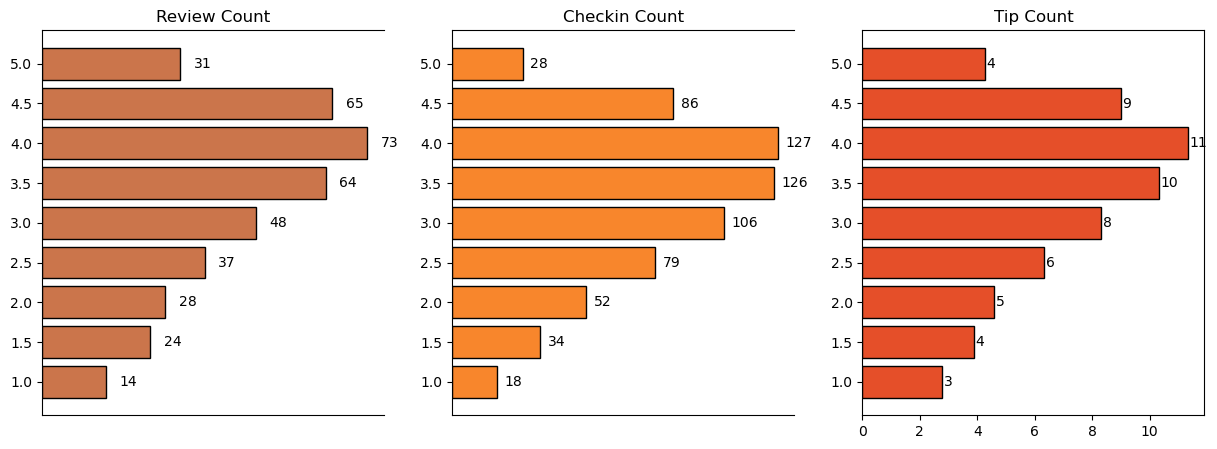

In [18]:
plt.figure(figsize=(15, 5))
plt.title('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])

# Review Count subplot
plt.subplot(1, 3, 1)
plt.title('Review Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'], edgecolor='k', color='#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')

plt.xticks([])

# Checkin Count subplot
plt.subplot(1, 3, 2)
plt.title('Checkin Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'], edgecolor='k', color='#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value + 3, i, str(round(value)), color='black', va='center')

plt.xticks([])

# Tip Count subplot
plt.subplot(1, 3, 3)
plt.title('Tip Count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'], edgecolor='k', color='#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):  # Corrected this line
    plt.text(value + 0.05, i, str(round(value)), color='black', va='center')

plt.show()

    

<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
    <li>Data shows a general increase in average review, check-in, and tip counts as ratings improve from 1 to 4 stars.</li>
    <li>Restaurants rated 4 stars exhibit the highest engagement and shows a downward trend for rating above 4.</li>
    <li>The drop in engagement at 5 stars might suggest either a saturation point where fewer customers feel compelled to add their reviews, or selectivity where only a small, satisfied audience frequents these etablishments.</li>
  </ol>
</div>

In [20]:
# Is there a correlation between the number of reviews, tips, and check-ins for a business?
engagement_df = pd.read_sql_query(f"""SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date,',','')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count
    FROM
         business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, count(business_id) AS tip_count FROM tip GROUP BY business_id ORDER BY tip_count) AS tip ON b.business_id = tip.business_id
    WHERE b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY
        b.business_id
""", conn).dropna()

In [21]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626837,0.766273
checkin_count,0.626837,1.000000,0.772061
tip_count,0.766273,0.772061,1.000000


<Axes: >

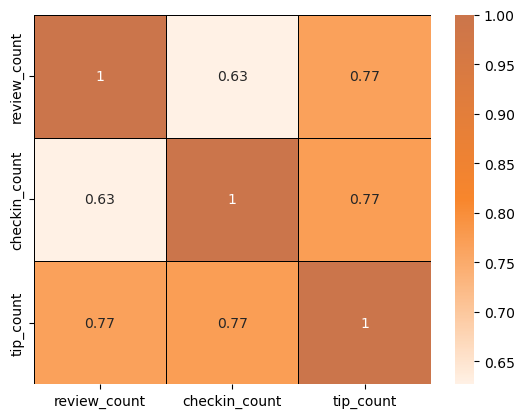

In [22]:
colors = ['#FFF1E5','#F8862C','#CB754B']
custom_cmap = LinearSegmentedColormap.from_list('mycmap',colors)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(), cmap = custom_cmap,
            annot = True, linewidth = 0.5, linecolor = 'black')

<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
   <li>This suggests that user engagement across different platforms is interlinked; higher activity in one area tends to be          associated with higher activity in others.</li>
    <li>Businesses should focus on strategies that boost all types of user engagement, as increases in one type of engagement  are likely to drive increases in others, enhancing overall visibility and interaction with customers.</li>
</ol>
</div>

In [23]:
# Is there a difference in the user engagement(reviews, tips and check-ins) between high-rated and low-rated businesses?
query = f"""
SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) AS tip_count,
    (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END) AS category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, COUNT(business_id) AS tip_count FROM tip GROUP BY business_id) AS tip ON b.business_id = tip.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
"""

df = pd.read_sql_query(query, conn).dropna()


In [24]:
df.groupby('category')[['review_count','checkin_count','tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-Rated,72.319991,122.106865,10.166411
Low-Rated,42.132915,88.905759,6.543136


<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
   <li>Data indicates a clear correlation between higher ratings and increased user engagement across reviews, tips, and check-ins.</li>
<li>This pattern underscores the importance of maintaining high service and quality standards, as these appear to drive more reviews, check-ins, and tips, which are critical metrics of customer engagement and satisfaction.</li>

</ol>
</div>

In [25]:
# function to calculate the success score based on avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score    

In [26]:
# How do the success metrics of restaurants vary across different states and cities?
city_df = pd.read_sql_query(f"""SELECT
city, state, latitude, longitude, AVG(stars) AS avg_rating, SUM(review_count) AS review_count,
count(*) as restaurant_count
FROM business
WHERE business_id IN{tuple(business_id['business_id'])}
GROUP BY state, city
ORDER BY review_count DESC
LIMIT 10
""", conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [27]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532011,175470,2999,42.649838
1,Tampa,FL,27.890814,-82.502346,3.571179,104368,1714,41.267425
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.385512,91562,1415,38.678743
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.692878,69233,1011,41.158043
6,Saint Louis,MO,38.583223,-90.407187,3.412963,51482,810,37.027259
7,Reno,NV,39.476518,-119.784037,3.478705,48340,587,37.521438
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558140,36087,559,37.338105


In [28]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green','yellow','#E54F29'],
                                   vmin = city_df['success_score'].min(),
                                   vmax = city_df['success_score'].max())

#Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
    location = [row['latitude'], row['longitude']],
    radius =5,
    color = color_scale(row['success_score']),
    fill=True,
    fill_color=color_scale(row['success_score']),
    fill_opacity=0.7,
    popup=f"Success Score : {row['success_score']}"
    ).add_to(m)
    
# Add color scale to the map
m.add_child(color_scale)

<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
  <li>Philadelphia emerges as the top city with the highest success score, indicating a combination of higher ratings and active user engagement.</li>
<li>Following Philadelphia, Tampa, Indianapolis, and Tucson rank among the top cities with significant success scores, suggesting thriving restaurant scenes in these areas.</li>

</ol>
</div>

In [30]:
high_rated_engagement_query = f"""
SELECT 
    review.month_year, 
    review.review_count, 
    tip.tip_count 
FROM 
    (SELECT 
        strftime('%m-%Y', date) AS month_year, 
        COUNT(*) AS review_count 
     FROM review 
     WHERE business_id IN {tuple(business_id['business_id'])} 
       AND stars >= 3.5 
     GROUP BY month_year 
     ORDER BY month_year) AS review 
JOIN 
    (SELECT 
        strftime('%m-%Y', tip.date) AS month_year, 
        COUNT(*) AS tip_count 
     FROM tip 
     JOIN business AS b 
     ON tip.business_id = b.business_id 
     WHERE tip.business_id IN {tuple(business_id['business_id'])} 
       AND b.stars >= 3.5 
     GROUP BY month_year 
     ORDER BY month_year) AS tip 
ON review.month_year = tip.month_year;
"""

# Corrected low-rated engagement query
low_rated_engagement_query = f"""
SELECT 
    review.month_year, 
    review.review_count, 
    tip.tip_count 
FROM 
    (SELECT 
        strftime('%m-%Y', date) AS month_year, 
        COUNT(*) AS review_count 
     FROM review 
     WHERE business_id IN {tuple(business_id['business_id'])} 
       AND stars < 3.5 
     GROUP BY month_year 
     ORDER BY month_year) AS review 
JOIN 
    (SELECT 
        strftime('%m-%Y', tip.date) AS month_year, 
        COUNT(*) AS tip_count 
     FROM tip 
     JOIN business AS b 
     ON tip.business_id = b.business_id 
     WHERE tip.business_id IN {tuple(business_id['business_id'])} 
       AND b.stars < 3.5 
     GROUP BY month_year 
     ORDER BY month_year) AS tip 
ON review.month_year = tip.month_year;
"""

# Execute the queries
high_rated_engagement = pd.read_sql_query(high_rated_engagement_query, conn)
low_rated_engagement = pd.read_sql_query(low_rated_engagement_query, conn)


In [31]:
time_rating = pd.read_sql_query(f"""
SELECT strftime('%m-%Y', date) AS month_year, AVG(stars) AS avg_rating
FROM review
WHERE business_id IN {tuple(business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year;
""", conn)


In [32]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace= True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace= True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(time_rating['month_year'])
low_rated_engagement.sort_values('month_year', inplace= True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']

In [33]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

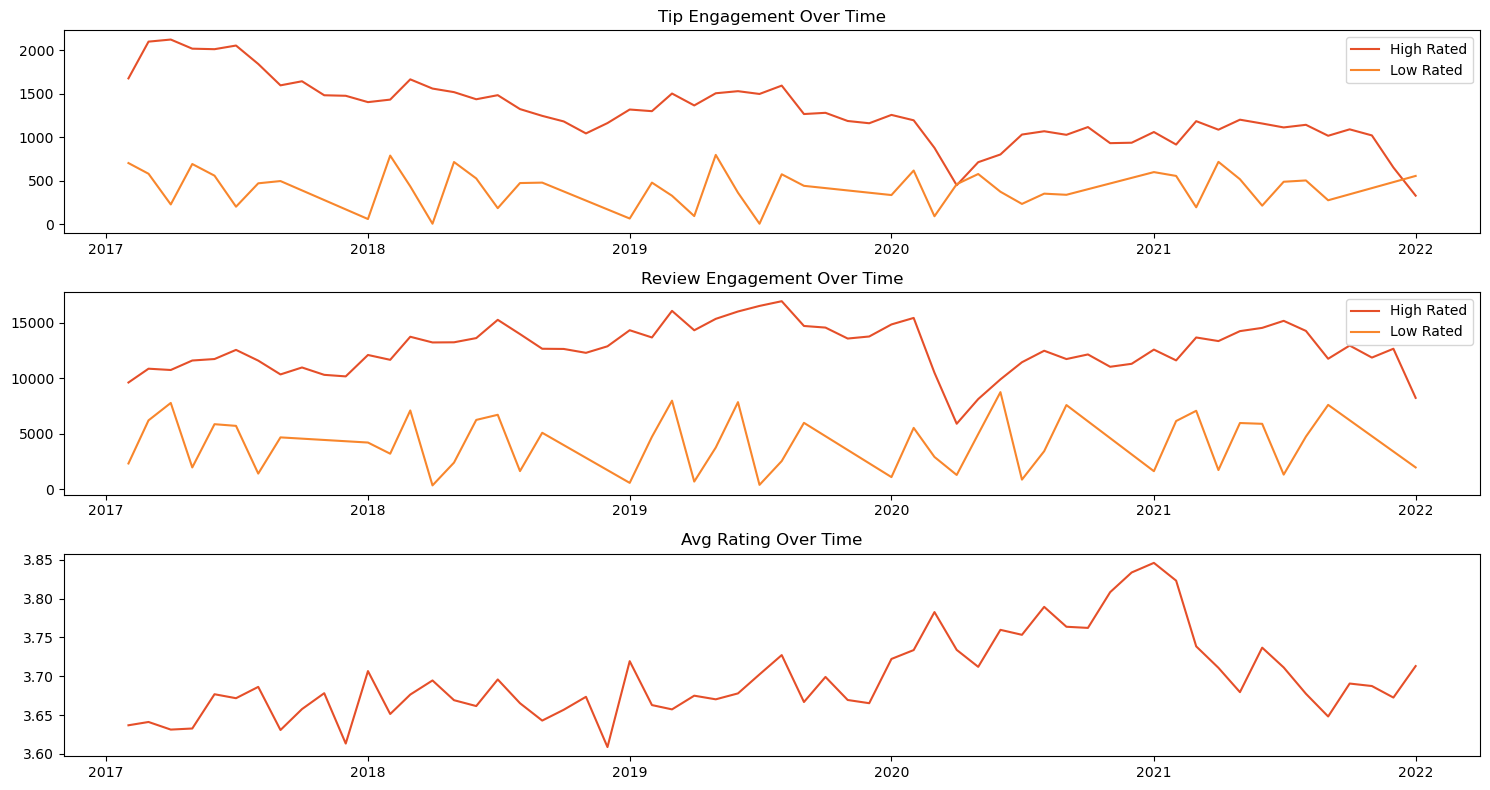

In [34]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], label = 'High Rated', color = '#E54F29')
plt.tight_layout()
plt.show()

<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
 <li>Successful businesses, particularly those with higher ratings (above 3.5), exhibit consistent and possibly increasing user engagement over time.</li>
<li>Highly rated restaurants maintain a steady or growing level of user engagement over time, reflecting ongoing customer interest and satisfaction.</li>
</ol>
</div>

In [35]:
tip_high_rated= high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

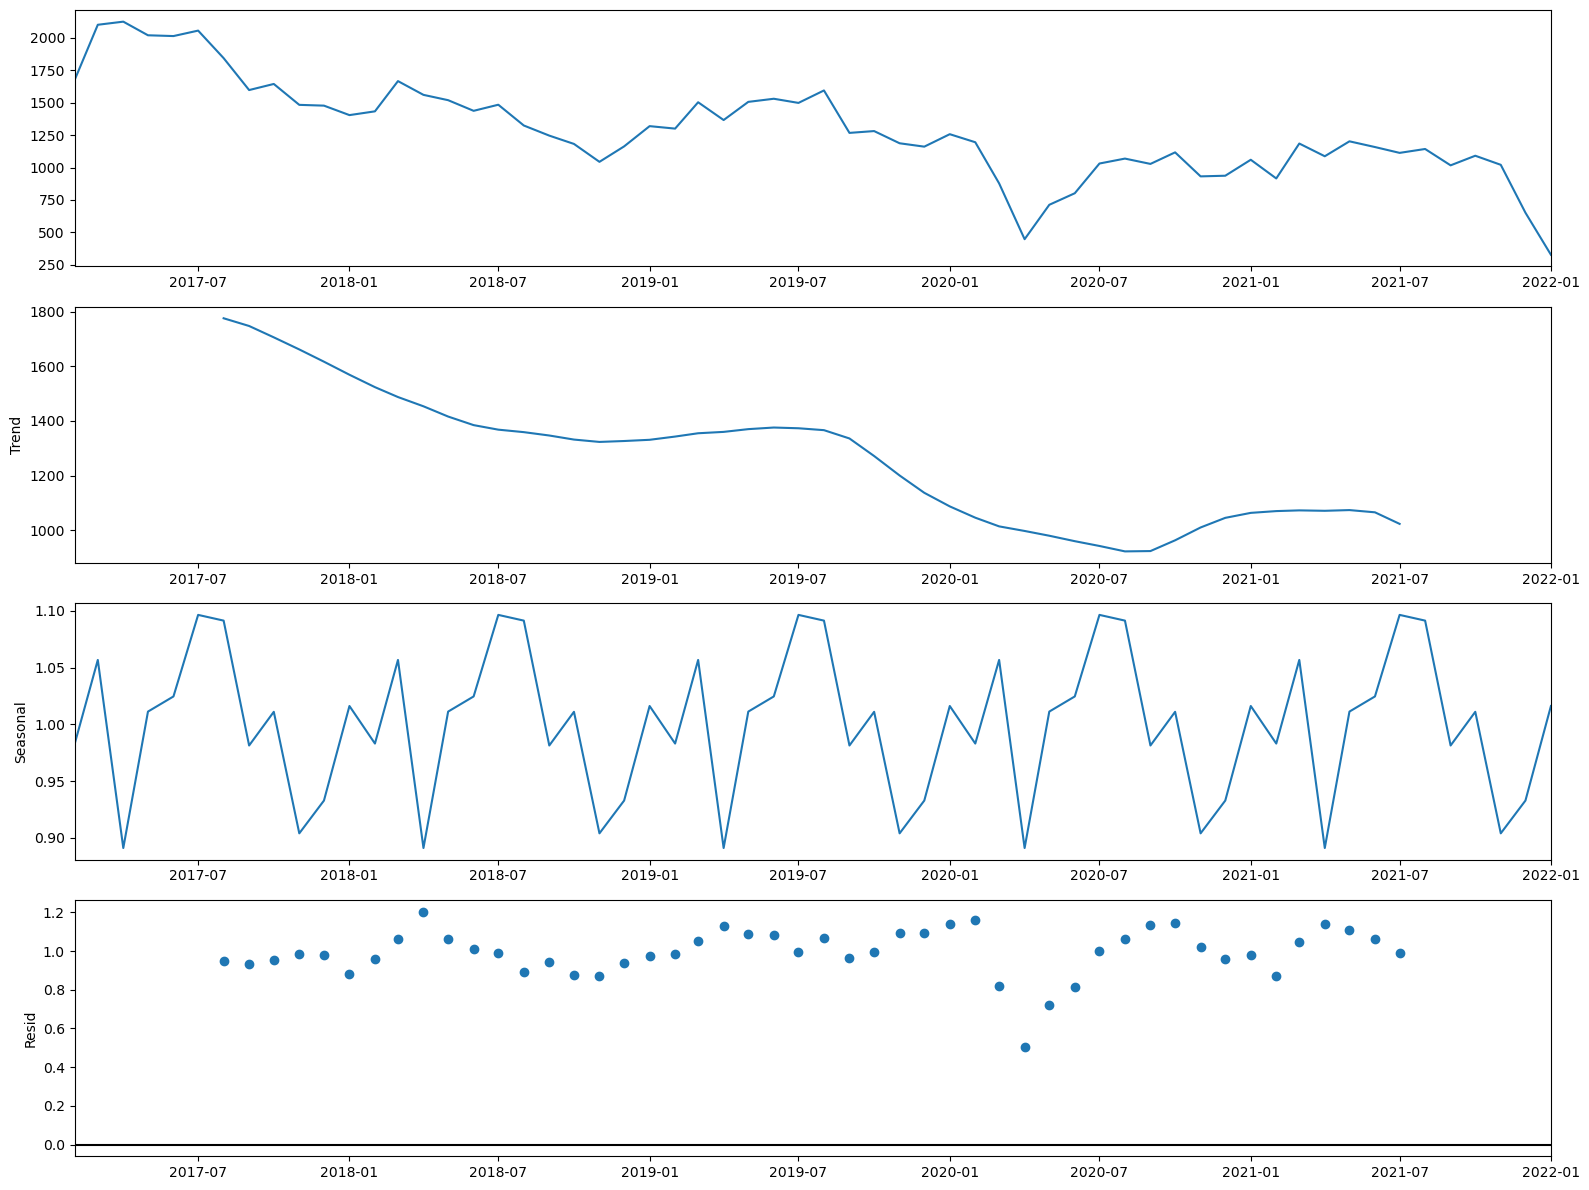

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
                                                 model = 'multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

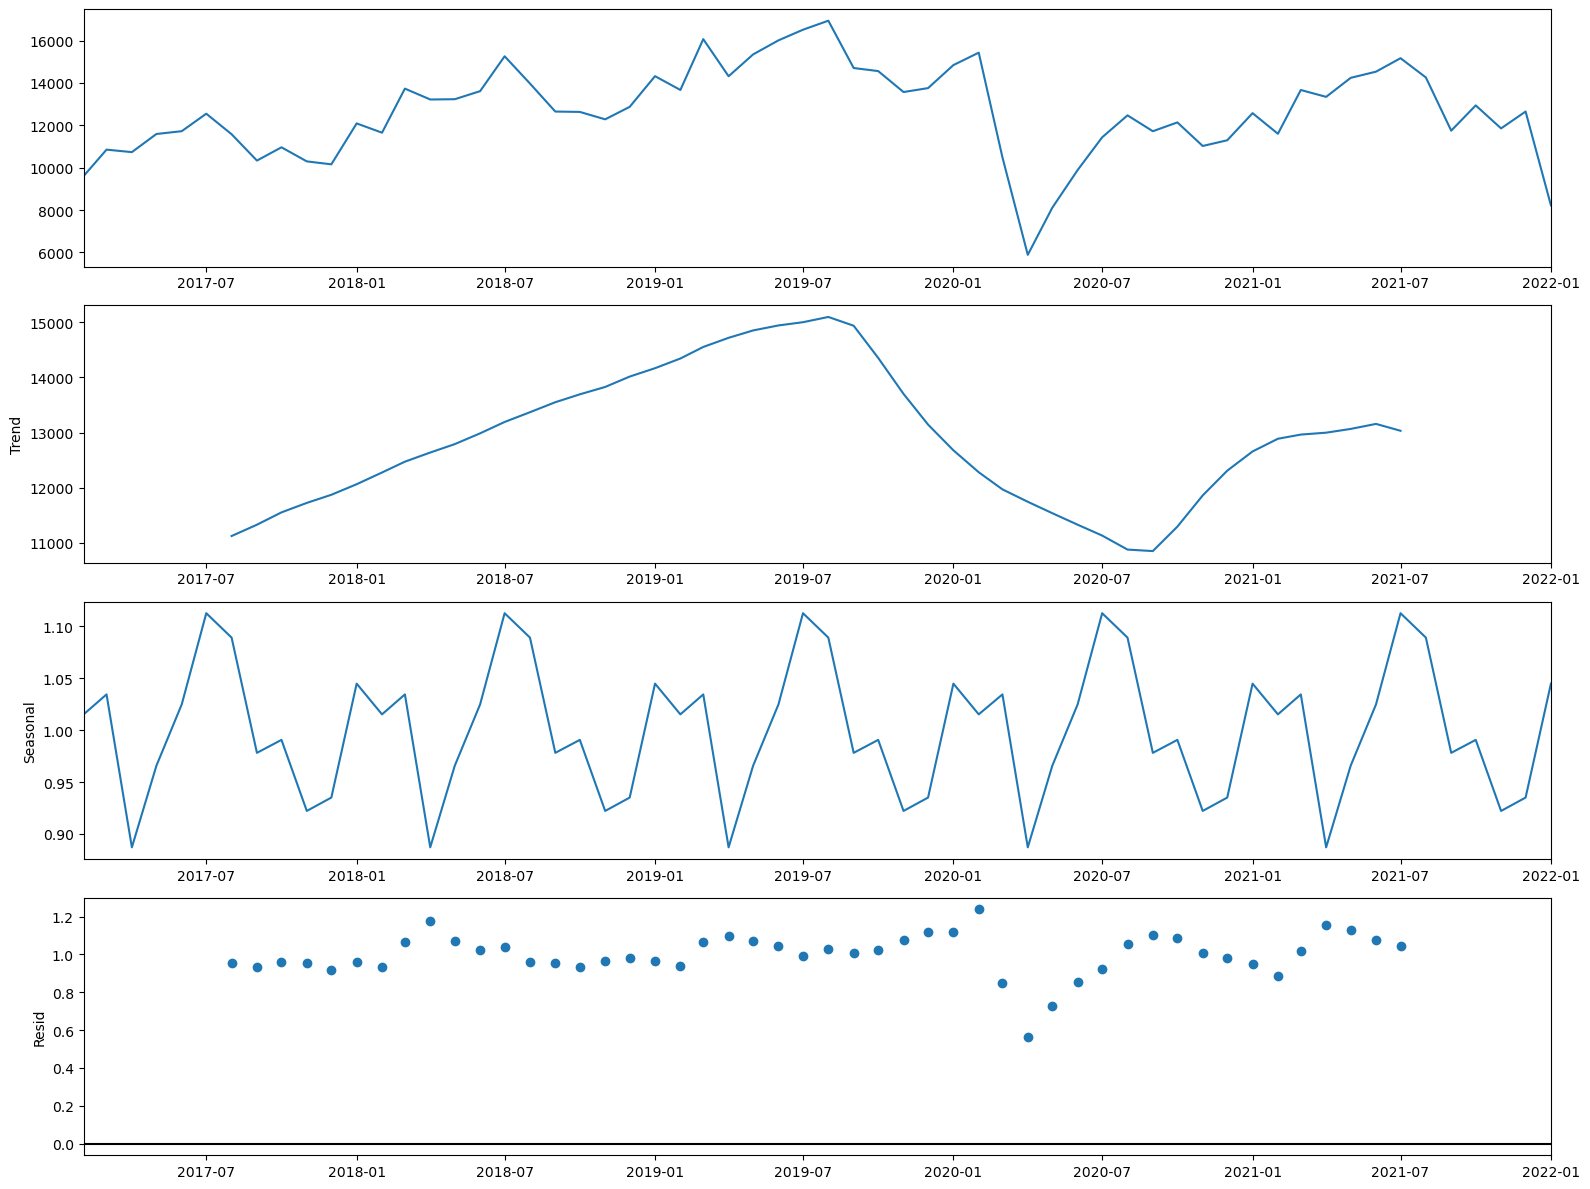

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(review_high_rated,
                                                 model = 'multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
The period from November to March is highly engaging.

</div>

In [41]:
# What are the busiest hours for restaurants?

review_engagement = pd.read_sql_query("""SELECT
 cast(strftime('%H', date) as integer)
 AS hour,
 COUNT (*) AS review_count
 FROM
 review
 GROUP BY
 hour;
""",conn)

tip_engagement = pd.read_sql_query("""SELECT
 cast(strftime('%H', date) as integer)
 AS hour,
 COUNT (*) AS tip_count
 FROM
 tip
 GROUP BY
 hour;
""",conn)

checkin = pd.read_sql_query("""SELECT date FROM checkin""",conn)
checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])
    
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

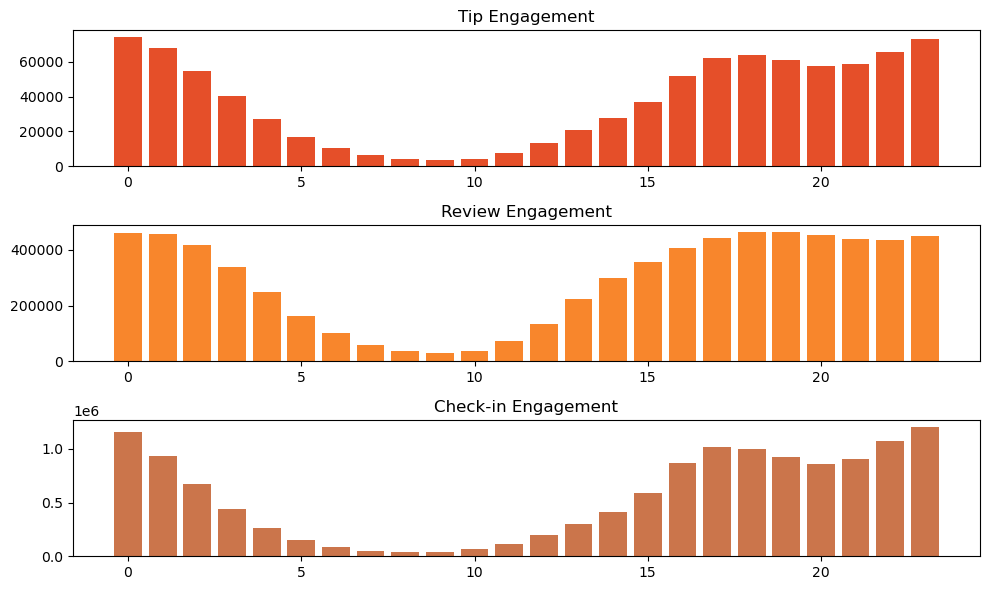

In [43]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'], tip_engagement['tip_count'], color='#E54F29')
plt.subplot(3, 1, 2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')
plt.subplot(3, 1, 3)
plt.title('Check-in Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color='#CB754B')
plt.tight_layout()
plt.show()

<div style="padding: 10px; border-radius: 10px; font-size: 18px; font-weight: bold; font-family: Arial, sans-serif;">
Insights
</div>

<div style="font-family: Arial, sans-serif;">
  <ol>
 <li>The busiest hours for restaurants, based on user engagement, span from 4 pm to 1 am.</li>
<li>Knowing the peak hours allows businesses to optimize their staffing levels and resource allocation during these times to 
    ensure efficient operations and quality service delivery.</li>
<li>The concentration of user engagement during the evening and night hours suggests a higher demand for dining out during
    these times, potentially driven by factors such as work schedules, social gatherings, and leisure activities.</li>
</ol>
</div>

<div style="background-color: #FFF1E5; padding: 20px; border-radius: 10px; font-size: 28px; font-weight: bold; font-family: Arial, sans-serif;">
 Recommendations
</div>


<div style="font-family: Arial, sans-serif;">
  <ol>
<li>Businesses can adjust their operating hours or introduce special promotions to capitalize on the increased demand during peak hours.</li>
<li>Less successful businesses may need to focus on strategies to enhance user engagement over time, such as improving service quality and responding to customer feedback.</li>
<li>Cities with high success scores present opportunities for restaurant chains to expand or invest further.</li>
<li>Collaborating with elite users and leveraging their influence can amplify promotional efforts, increase brand awareness, and drive customer acquisition.</li>


</ol>
</div>